# urban computer project2

## Task 1: Data Preparation

### 1.1 download road network data from OpenStreetMap
(https://github.com/cyang-kth/fmm/blob/master/example/osmnx_example/download_network.ipynb)


In [3]:
# # we should inatall this package
# %pip install osmnx


In [22]:
import osmnx as ox
import time
from shapely.geometry import Polygon
import os
import numpy as np

def save_graph_shapefile_directional(G, filepath=None, encoding="utf-8"):
    # default filepath if none was provided
    if filepath is None:
        filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

    # if save folder does not already exist, create it (shapefiles
    # get saved as set of files)
    if not filepath == "" and not os.path.exists(filepath):
        os.makedirs(filepath)
    filepath_nodes = os.path.join(filepath, "nodes.shp")
    filepath_edges = os.path.join(filepath, "edges.shp")

    # convert undirected graph to gdfs and stringify non-numeric columns
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
    gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)

    # We need an unique ID for each edge
    gdf_edges["fid"] = np.arange(0, gdf_edges.shape[0], dtype='int')

    # save the nodes and edges as separate ESRI shapefiles
    gdf_nodes.to_file(filepath_nodes, encoding=encoding)
    gdf_edges.to_file(filepath_edges, encoding=encoding)

print("osmnx version",ox.__version__)


osmnx version 1.7.0


/var/folders/7j/3vvyvj8s057f8vbgkg5js7v40000gn/T/ipykernel_54511/39420161.py:28: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, encoding=encoding)


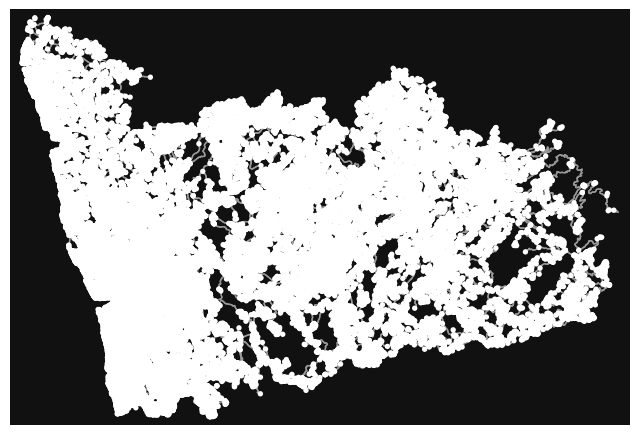

In [19]:

place ="Porto, Portugal"

start_time = time.time()
G = ox.graph_from_place(place, network_type='drive', which_result=2)

# save_graph_shapefile_directional(G, filepath='./data/porto')
print("--- %s seconds ---" % (time.time() - start_time))

ox.plot_graph(G)
ox.save_graphml(G)

### 1.2 download the trajectory data from Kaggle
(https://www.kaggle.com/c/pkdd-15-predict-taxi-service-trajectory-i/data)
the data is saved in data file

In [21]:
# !kaggle competitions download -c pkdd-15-predict-taxi-service-trajectory-i

In [27]:
import pandas as pd

# Read the dataset

df_1500 = pd.read_csv('./data/train.csv', nrows = 1000)
train_1500 = pd.DataFrame(df_1500)

# Save to a new CSV file
df_1500.to_csv('data/train-1500.csv', index=False)


In [28]:
train_1500.head(15)

,TRIP_ID,CALL_TYPE,ORIGIN_CALL,ORIGIN_STAND,TAXI_ID,TIMESTAMP,DAY_TYPE,MISSING_DATA,POLYLINE
0,1372636858620000589,C,NaN,NaN,20000589,1372636858,A,False,"[[-8.618643,41.141412],[-8.618499,41.141376],[..."
1,1372637303620000596,B,NaN,7.0,20000596,1372637303,A,False,"[[-8.639847,41.159826],[-8.640351,41.159871],[..."
2,1372636951620000320,C,NaN,NaN,20000320,1372636951,A,False,"[[-8.612964,41.140359],[-8.613378,41.14035],[-..."
3,1372636854620000520,C,NaN,NaN,20000520,1372636854,A,False,"[[-8.574678,41.151951],[-8.574705,41.151942],[..."
4,1372637091620000337,C,NaN,NaN,20000337,1372637091,A,False,"[[-8.645994,41.18049],[-8.645949,41.180517],[-..."
5,1372636965620000231,C,NaN,NaN,20000231,1372636965,A,False,"[[-8.615502,41.140674],[-8.614854,41.140926],[..."
6,1372637210620000456,C,NaN,NaN,20000456,1372637210,A,False,"[[-8.57952,41.145948],[-8.580942,41.145039],[-..."
7,1372637299620000011,C,NaN,NaN,20000011,1372637299,A,False,"[[-8.617563,41.146182],[-8.617527,41.145849],[..."
8,1372637274620000403,C,NaN,NaN,20000403,1372637274,A,False,"[[-8.611794,41.140557],[-8.611785,41.140575],[..."
9,1372637905620000320,C,NaN,NaN,20000320,1372637905,A,False,"[[-8.615907,41.140557],[-8.614449,41.141088],[..."


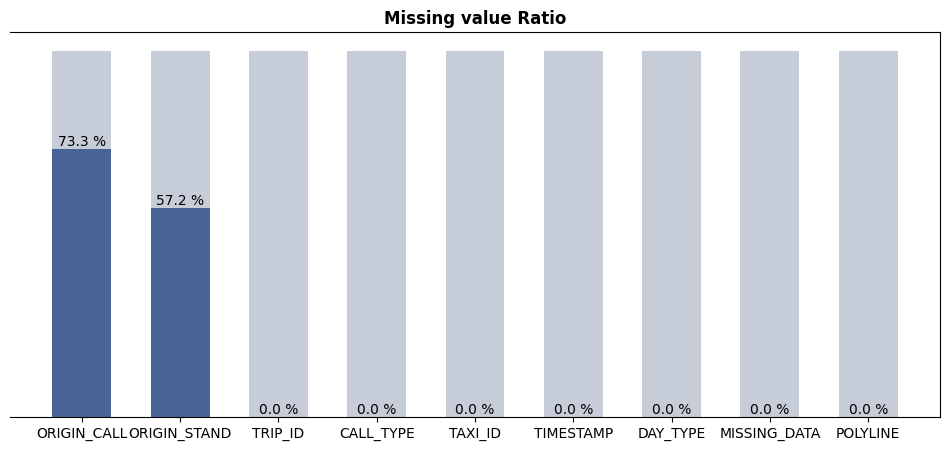

In [32]:
import matplotlib.pyplot as plt
primary_grey = "#c6ccd8"
primary_blue = "#496595"

nan_data = (df_1500.isna().sum().sort_values(ascending=False) / len(df_1500) * 100)[:9]
fig, ax = plt.subplots(1,1,figsize=(12, 5))

ax.bar(nan_data.index, 100, color=primary_grey, width=0.6)

bar = ax.bar(
    nan_data.index, 
    nan_data, 
    color=primary_blue, 
    width=0.6
)
ax.bar_label(bar, fmt='%.01f %%')
ax.spines.left.set_visible(False)
ax.set_yticks([])
ax.set_title('Missing value Ratio', fontweight='bold')

plt.show()